题目：

为22.LDA_test.txt这篇文档中的9篇文章确定主题，使用不同的主题模型方法

## 1.导入数据库

导入库

In [1]:
import numpy as np
from gensim import corpora, models, similarities  # 导入gensim库中的 文本预处理包、模型包、相似度包
from pprint import pprint                         # pprint 其实和print差不多，文本处理常用
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys

## 2.对文本数据预处理

去除停止词

In [2]:
f = open('22.LDA_test.txt')

# 去除停止词
stop_list = set('for a of the and to in'.split())  # 得到一个停止词列表
# texts = [line.strip().split() for line in f]
# print(texts)
texts = [[word for word in line.strip().lower().split() if word not in stop_list] for line in f] # 遍历文本，去除停止词
print('Text = ')
pprint(texts)

Text = 
[['human', 'machine', 'interface', 'lab', 'abc', 'computer', 'applications'],
 ['survey', 'user', 'opinion', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'management', 'system'],
 ['system', 'human', 'system', 'engineering', 'testing', 'eps'],
 ['relation', 'user', 'perceived', 'response', 'time', 'error', 'measurement'],
 ['generation', 'random', 'binary', 'unordered', 'trees'],
 ['intersection', 'graph', 'paths', 'trees'],
 ['graph', 'minors', 'iv', 'widths', 'trees', 'well', 'quasi', 'ordering'],
 ['graph', 'minors', 'survey']]


将去除过停止词的文本向量化 TF-IDF

In [3]:
dictionary = corpora.Dictionary(texts)  # 将texts中的词写成字典的形式
V = len(dictionary)
corpus = [dictionary.doc2bow(text) for text in texts]  # 遍历texts中的词，化为向量形式

# 使用gensim库中的文本预处理包corpora进行TF-IDF
corpus_tfidf = models.TfidfModel(corpus)[corpus]

In [4]:
# 打印出结果（每个文档每个词出现的频率）
print('TF-IDF:')
for c in corpus_tfidf:
    print(c)

TF-IDF:
[(0, 0.4301019571350565), (1, 0.4301019571350565), (2, 0.2944198962221451), (3, 0.2944198962221451), (4, 0.2944198962221451), (5, 0.4301019571350565), (6, 0.4301019571350565)]
[(2, 0.3726494271826947), (7, 0.5443832091958983), (8, 0.3726494271826947), (9, 0.3726494271826947), (10, 0.27219160459794917), (11, 0.3726494271826947), (12, 0.27219160459794917)]
[(4, 0.438482464916089), (10, 0.32027755044706185), (12, 0.32027755044706185), (13, 0.438482464916089), (14, 0.6405551008941237)]
[(3, 0.3449874408519962), (10, 0.5039733231394895), (13, 0.3449874408519962), (15, 0.5039733231394895), (16, 0.5039733231394895)]
[(8, 0.30055933182961736), (11, 0.30055933182961736), (12, 0.21953536176370683), (17, 0.43907072352741366), (18, 0.43907072352741366), (19, 0.43907072352741366), (20, 0.43907072352741366)]
[(21, 0.48507125007266594), (22, 0.48507125007266594), (23, 0.48507125007266594), (24, 0.24253562503633297), (25, 0.48507125007266594)]
[(24, 0.31622776601683794), (26, 0.316227766016837

## 3.应用模型

应用LSI模型

In [5]:
print('\nLSI Model:')

# 将预处理好的文本 corpus_tfidf 喂给模型 ；主题数设置为2
lsi = models.LsiModel(corpus_tfidf, num_topics=5, id2word=dictionary)
topic_result = [a for a in lsi[corpus_tfidf]]
pprint(topic_result)
print('=====================================================================================================================')
print('LSI Topics:')
pprint(lsi.print_topics(num_topics=2, num_words=5))

# 相似度计算
similarity = similarities.MatrixSimilarity(lsi[corpus_tfidf])   # 用的是 similarities.Similarity()
print('=====================================================================================================================')
print('Similarity:')
pprint(list(similarity))


LSI Model:
[[(0, 0.34057117986841856),
  (1, -0.20602251622679665),
  (2, 0.2516322932612179),
  (3, -0.06646636031660592),
  (4, 0.8634175502633786)],
 [(0, 0.6933040002171567),
  (1, 0.0072327583903888555),
  (2, -0.42828031011610473),
  (3, 0.009221456247179308),
  (4, 0.0724554047622463)],
 [(0, 0.5902607670389718),
  (1, -0.3526046949085578),
  (2, 0.3088320925810756),
  (3, 0.015857166285258944),
  (4, -0.2416566944150778)],
 [(0, 0.5214901821825126),
  (1, -0.3388797615405538),
  (2, 0.4328304015902554),
  (3, -0.03897722688934212),
  (4, -0.33361514099931583)],
 [(0, 0.3953319317635446),
  (1, -0.059192853366599525),
  (2, -0.6817088379096495),
  (3, 0.2755580402790416),
  (4, -0.05393081477954104)],
 [(0, 0.03635317352849357),
  (1, 0.18146550208818857),
  (2, 0.2040948457195011),
  (3, 0.8684447611727187),
  (4, 0.08100886500516388)],
 [(0, 0.14709012328778923),
  (1, 0.4943294812782235),
  (2, 0.2520741552399362),
  (3, 0.2575886501115436),
  (4, -0.04099410336036606)],
 [(

LSI Model的主题概率出现了负数，是因为计算的方法所致

应用LDA模型

In [6]:
print('LDA Model:')
num_topics = 5
topic_list = []
word_list = []

# 将预处理好的文本 corpus_tfidf 喂给模型 ；主题数设置为2 ；超参数‘alpha’，‘eta’设置为自动选择
lda = models.LdaModel(corpus_tfidf, num_topics=num_topics, id2word=dictionary,
                        alpha='auto', eta='auto', minimum_probability=0.001)
doc_topic = [doc_t for doc_t in lda[corpus_tfidf]]
print('Document-Topic:')
pprint(doc_topic)
for doc_topic in lda.get_document_topics(corpus_tfidf): # 打印出各个主题的概率
    topic_list.append(doc_topic)
    print(doc_topic)

# 打印出各个主题的代表词
print('=====================================================================================================================')
for topic_id in range(num_topics):
    print('Topic', topic_id)
    # pprint(lda.get_topic_terms(topicid=topic_id))
    word_list.append(lda.show_topic(topic_id))
    pprint(lda.show_topic(topic_id))

# 打印出相似度
print('=====================================================================================================================')
similarity = similarities.MatrixSimilarity(lda[corpus_tfidf])  # 用的是 similarities.Similarity()
print('Similarity:')
pprint(list(similarity))

LDA Model:
Document-Topic:
[[(0, 0.03991476),
  (1, 0.7977135),
  (2, 0.06086463),
  (3, 0.039947882),
  (4, 0.06155916)],
 [(0, 0.04019181),
  (1, 0.061950173),
  (2, 0.7945601),
  (3, 0.04022522),
  (4, 0.06307277)],
 [(0, 0.045684014),
  (1, 0.071155824),
  (2, 0.069710456),
  (3, 0.045721956),
  (4, 0.7677278)],
 [(0, 0.045042574),
  (1, 0.77153283),
  (2, 0.06849663),
  (3, 0.04507998),
  (4, 0.069847964)],
 [(0, 0.04022006),
  (1, 0.061154842),
  (2, 0.061865725),
  (3, 0.040253453),
  (4, 0.7965059)],
 [(0, 0.045320433),
  (1, 0.0693284),
  (2, 0.7704171),
  (3, 0.045358133),
  (4, 0.069575906)],
 [(0, 0.04990512),
  (1, 0.74641037),
  (2, 0.0768665),
  (3, 0.049946576),
  (4, 0.07687144)],
 [(0, 0.038473662),
  (1, 0.0591654),
  (2, 0.060071163),
  (3, 0.03850564),
  (4, 0.8037842)],
 [(0, 0.053341523),
  (1, 0.08157264),
  (2, 0.72944605),
  (3, 0.053385716),
  (4, 0.08225401)]]
[(0, 0.039914764), (1, 0.79771465), (2, 0.060865086), (3, 0.039947882), (4, 0.06155758)]
[(0, 0.040

应用HDA模型

In [7]:
# 将预处理好的文本 corpus_tfidf 喂给模型 ；主题数设置为2
hda = models.HdpModel(corpus_tfidf, id2word=dictionary)
topic_result = [a for a in hda[corpus_tfidf]]
print('\n\nUSE WITH CARE--\nHDA Model:')
pprint(topic_result)
print('=====================================================================================================================')

print('HDA Topics:')
print(hda.print_topics(num_topics=5, num_words=5))



USE WITH CARE--
HDA Model:
[[(0, 0.7903639655522441),
  (1, 0.054052514151009146),
  (2, 0.039170181275297394),
  (3, 0.02942217652431822),
  (4, 0.022199786864642516),
  (5, 0.016646266203619104),
  (6, 0.012288201872992014)],
 [(0, 0.7891051188969954),
  (1, 0.054452213296146884),
  (2, 0.03926355218903703),
  (3, 0.029596386271133802),
  (4, 0.022351436108928695),
  (5, 0.016759285083583344),
  (6, 0.012371637128100457)],
 [(0, 0.0844916328808466),
  (1, 0.7381825464169942),
  (2, 0.044521532971464425),
  (3, 0.03353863545834879),
  (4, 0.02533247609198699),
  (5, 0.018994974980894825),
  (6, 0.014022020411755732),
  (7, 0.010504143551482482)],
 [(0, 0.08326048688367906),
  (1, 0.6019523511289068),
  (2, 0.18379491387794336),
  (3, 0.03308421893147109),
  (4, 0.024986634522262616),
  (5, 0.01873505339999531),
  (6, 0.013830121256441598),
  (7, 0.010360388479732724)],
 [(0, 0.7888700659907043),
  (1, 0.054588201216119465),
  (2, 0.03928743392207219),
  (3, 0.029612376006594585),
  

这个模型还不完美，最好还是用LDA，其他作为了解

## 4.画出文档的主题分布和主题的词分布

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. Th

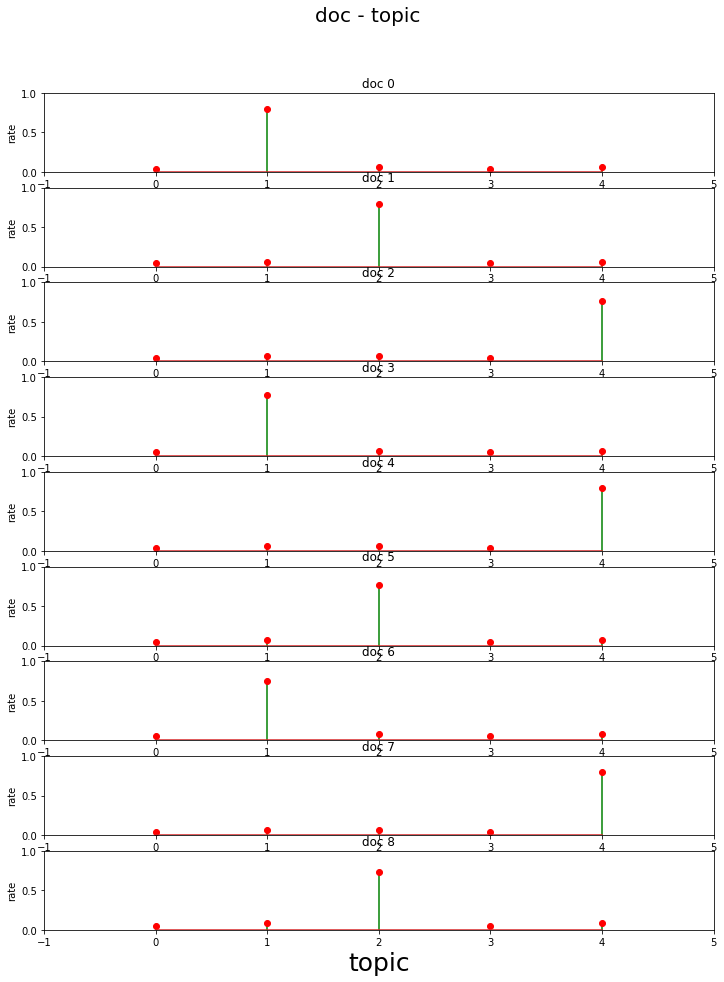

In [8]:
# 文档的主题分布
topic_array = np.array(topic_list)
topic = topic_array.T[1,:].T      # 这是为了造出单独的每个文档的主题分布来

# 画图
plt.figure(figsize=(12,15))
# f, ax= plt.subplots(5, 1, figsize=(8, 6), sharex=True)
for i, k in enumerate([0, 1, 2, 3, 4, 5, 6, 7, 8]):  # 遍历9个文档
    ax = plt.subplot(9, 1, i+1)
    ax.stem(topic[k, :], linefmt='g-', markerfmt='ro')
    ax.set_xlim(-1, num_topics)
    ax.set_ylim(0, 1)
    ax.set_ylabel('rate')
    ax.set_title('doc {}'.format(k))
plt.xlabel('topic', fontsize=25)
plt.suptitle('doc - topic', fontsize=20)
# plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

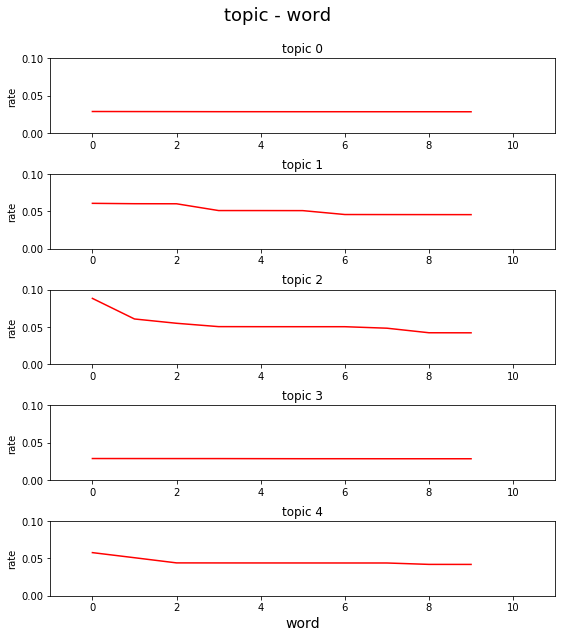

In [66]:
# 主题的词分布
word_array = np.array(word_list)
word_str = word_array.T[1,:].T
word_num = [[float(i) for i in l] for l in word_str]
word = np.array(word_num)                                  # 将主题词分布的概率转换为数组形式

# 画图
plt.figure(figsize=(8, 9))
# f, ax = plt.subplots(5, 1, sharex=True)
for i, k in enumerate([0, 1, 2, 3, 4]):
    ax = plt.subplot(5, 1, i+1)
    ax.plot(word[k, :], 'r-')
    ax.set_xlim(-1, 11)   # [0,10]
    ax.set_ylim(0, 0.1)
    ax.set_ylabel('rate')
    ax.set_title('topic {}'.format(k))
plt.xlabel('word', fontsize=14)
plt.tight_layout()
plt.suptitle('topic - word', fontsize=18)
plt.subplots_adjust(top=0.9)
plt.show()